In [411]:
import pandas as pd
import re
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import itertools
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
/usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
['NanumGothic']


Text(0.3, 0.3, '한글')

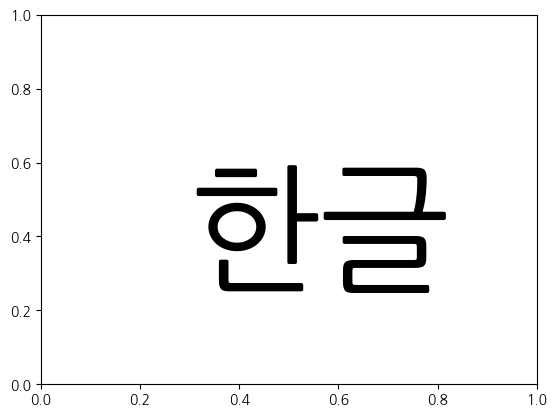

In [412]:
# 설치된 글꼴 이름 파악을 위해서!!


# 설정 파일 위치 확인
print(mpl.matplotlib_fname())
print(mpl.__file__)

# Jupyter Notebook 로드 시 같이 올라온 font 목록 확인
[f.fname for f in fm.fontManager.ttflist]	# NanumGothic.ttf 목록에서 확인 완료!!!

# NanumGothic 설정 확인
plt.rcParams['font.family'] = 'NanumGothic'
print(plt.rcParams['font.family'])		# NanumGothic 설정 제대로 먹힌 것을 확인!!!

# 마이너스(-)가 '□'로 깨지는 것을 방지하기 위하여 설정!!!
mpl.rcParams['axes.unicode_minus'] = False

# matplotlib 차트에 한글이 제대로 표시되는지 확인
plt.text(0.3, 0.3, '한글', size = 100)

In [413]:
x = pd.read_json("./raw/lyrics_dataset.json")

In [414]:
x[x['title']=='My Love']

,index,title,lyrics,genre,mungchi,label,chunk_strategy,sampling_strategy,syllable_limit
2594,4623,My Love,난 안되겠니 이생에서\n다음 생에선 되겠니\n약속한다면 오늘이 끝이라도\n두렵지 않...,"발라드, 국내드라마","[[1, 4, 4], [2, 3, 3], [5, 3, 4], [3, 3, 2, 4]...","[[난, 안되겠니, 이생에서], [다음, 생에선, 되겠니], [약속한다면, 오늘이,...",word,one,0
3203,6344,My Love,(나 이제 알아~~~) (가까이 와봐~~~)\n내 곁에서 언제나 날 지켜주는 너\n...,댄스,"[[1, 2, 2, 3, 2], [1, 3, 3, 1, 4, 1], [2, 2, 2...","[[(나, 이제, 알아~~~), (가까이, 와봐~~~)], [내, 곁에서, 언제나,...",word,one,0
4567,10201,My Love,사랑해 그 말은 무엇보다 아픈 말\n숨죽여서 하는 말\n이젠하기 힘든 말\nOh 햇...,발라드,"[[3, 1, 2, 4, 2, 1], [4, 2, 1], [4, 2, 1], [2,...","[[사랑해, 그, 말은, 무엇보다, 아픈, 말], [숨죽여서, 하는, 말], [이젠...",word,one,0
8684,4623,My Love,난 안되겠니 이생에서\n다음 생에선 되겠니\n약속한다면 오늘이 끝이라도\n두렵지 않...,"발라드, 국내드라마","[[1, 4, 4, 2, 3, 3, 5, 3, 4, 3, 3, 2, 4, 2, 2,...","[[난, 안되겠니, 이생에서, 다음, 생에선, 되겠니, 약속한다면, 오늘이, 끝이라...",word,total,0
9293,6344,My Love,(나 이제 알아~~~) (가까이 와봐~~~)\n내 곁에서 언제나 날 지켜주는 너\n...,댄스,"[[1, 2, 2, 3, 2, 1, 3, 3, 1, 4, 1, 2, 2, 2, 2,...","[[(나, 이제, 알아~~~), (가까이, 와봐~~~), 내, 곁에서, 언제나, 날...",word,total,0
10657,10201,My Love,사랑해 그 말은 무엇보다 아픈 말\n숨죽여서 하는 말\n이젠하기 힘든 말\nOh 햇...,발라드,"[[3, 1, 2, 4, 2, 1, 4, 2, 1, 4, 2, 1, 2, 3, 2,...","[[사랑해, 그, 말은, 무엇보다, 아픈, 말, 숨죽여서, 하는, 말, 이젠하기, ...",word,total,0
14774,4623,My Love,난 안되겠니 이생에서\n다음 생에선 되겠니\n약속한다면 오늘이 끝이라도\n두렵지 않...,"발라드, 국내드라마","[[1, 4, 4, 2, 3, 3, 5, 3, 4, 3, 3, 2, 4], [2, ...","[[난, 안되겠니, 이생에서, 다음, 생에선, 되겠니, 약속한다면, 오늘이, 끝이라...",word,L,30
15383,6344,My Love,(나 이제 알아~~~) (가까이 와봐~~~)\n내 곁에서 언제나 날 지켜주는 너\n...,댄스,"[[1, 2, 2, 3, 2, 1, 3, 3, 1, 4, 1, 2, 2, 2, 2,...","[[(나, 이제, 알아~~~), (가까이, 와봐~~~), 내, 곁에서, 언제나, 날...",word,L,30
16747,10201,My Love,사랑해 그 말은 무엇보다 아픈 말\n숨죽여서 하는 말\n이젠하기 힘든 말\nOh 햇...,발라드,"[[3, 1, 2, 4, 2, 1, 4, 2, 1, 4, 2, 1, 2, 3, 2,...","[[사랑해, 그, 말은, 무엇보다, 아픈, 말, 숨죽여서, 하는, 말, 이젠하기, ...",word,L,30
20864,4623,My Love,난 안되겠니 이생에서\n다음 생에선 되겠니\n약속한다면 오늘이 끝이라도\n두렵지 않...,"발라드, 국내드라마","[[9], [8], [12], [12], [13], [10], [6], [14], ...","[[난 안되겠니 이생에서], [다음 생에선 되겠니], [약속한다면 오늘이 끝이라도]...",line,one,0


In [415]:
filter_x = pd.read_csv("len_over_line_df.csv")

In [416]:
print(filter_x[filter_x['가수']=='Anyband']['lyrics'])

96    Anywhere you go, anywhere you go,\nanywhere yo...
97    Anywhere you go, anywhere you go,\nanywhere yo...
Name: lyrics, dtype: object


In [417]:
x.sample(5)

,index,title,lyrics,genre,mungchi,label,chunk_strategy,sampling_strategy,syllable_limit
24263,14283,멜로디,어딘가 들어본 듯한 이 Melody\n떠올라 작은 기억들이 My memories\n...,랩/힙합,"[[15], [19], [17], [7], [20], [15], [19], [17]...","[[어딘가 들어본 듯한 이 Melody], [떠올라 작은 기억들이 My memori...",line,one,0
10867,10775,할말 있어요 (Gotta Talk To U),나 오늘 그대에게\n할말이 너무나 많아요\n부디 내 얘길\n들어 줄 수 있나요\n그...,댄스,"[[1, 2, 4, 3, 3, 3, 2, 1, 2, 2, 1, 1, 3, 2, 2,...","[[나, 오늘, 그대에게, 할말이, 너무나, 많아요, 부디, 내, 얘길, 들어, 줄...",word,total,0
33673,6403,다행이다,그대를 만나고\n그대의 머릿결을 만질 수가 있어서\n그대를 만나고\n그대와 마주보며...,발라드,"[[6, 14, 6], [6, 13, 4], [6, 14], [14, 13], [9...","[[그대를 만나고, 그대의 머릿결을 만질 수가 있어서, 그대를 만나고], [그대를 ...",line,L,30
23013,10675,"거품 안 넘치게 따라줘 (Life Is Good) (Feat. Crush, DJ F...",my life is good life is good\n난 부지런한 편은 아니라서\n...,랩/힙합,"[[22], [11], [10], [10], [7], [8], [15], [11],...","[[my life is good life is good], [난 부지런한 편은 아니...",line,one,0
29688,12350,빗속으로,비가 오면 빛이 나는 내사랑\n이런 밤에 뒤척이면\n내 맘은 지쳐\n빗속으로 빗속으...,록/메탈,"[[11, 8, 5, 8, 10, 10, 10, 11, 13, 8, 10, 10, ...","[[비가 오면 빛이 나는 내사랑, 이런 밤에 뒤척이면, 내 맘은 지쳐, 빗속으로 빗...",line,total,0


In [418]:
filter_x = filter_x[filter_x['변경여부']=='o'].drop_duplicates(subset='title')

In [419]:
filter_x

,Unnamed: 0,title,가수,lyrics,genre,year,label,chunk_strategy,sampling_strategy,syllable_limit,mungchi,변경 lyrics,변경여부
0,0,애수,김완선,"불빛에 흔들리는 두 사람 서로의 눈길에 취했나\n가끔씩 부딪힌 어깨 , 향기로운 내...",댄스,1992,"[['불빛에 흔들리는 두 사람 서로의 눈길에 취했나'], ['가끔씩 부딪힌 어깨 ,...",line,one,0,"[[19], [25], [19], [25], [26], [25], [31], [26]]","불빛에 흔들리는 두 사람 서로의 눈길에 취했나\n가끔씩 부딪힌 어깨 , 향기로운 내...",o
5,5,내가 너의 곁에 잠시 살았다는 걸,"토이, 김연우",지운 줄 알았어 너에 기억들을\n친구들을 함께 모여 술에 취한 밤 니 생각에 난 힘...,발라드,1996,"[['지운 줄 알았어 너에 기억들을'], ['친구들을 함께 모여 술에 취한 밤 니 ...",line,one,0,"[[12], [22], [12], [18], [11], [13], [10], [14...",지운 줄 알았어 너에 기억들을\n친구들을 함께 모여 술에 취한 밤 니 생각에 난 힘...,o
10,10,P.S. I Love You,박정현,우연히 그댈 처음 본 순간 운명이란걸 느낄 수가 있었어 사랑의 시작을 먼저 말할 수...,발라드,1998,[['우연히 그댈 처음 본 순간 운명이란걸 느낄 수가 있었어 사랑의 시작을 먼저 말...,line,one,0,"[[109], [38], [29], [28], [38], [29], [19]]",우연히 그댈 처음 본 순간 운명이란걸 \n느낄 수가 있었어 사랑의 시작을 \n먼저 ...,o
12,12,Jingle Bell,SMTOWN,종이 울려서 모두 여기 모여서 그렇게 짜증났던 일들 모두 잊어버려 지워버려\n너와 ...,-,2000,[['종이 울려서 모두 여기 모여서 그렇게 짜증났던 일들 모두 잊어버려 지워버려']...,line,one,0,"[[31], [19], [16], [32], [16], [3], [46], [34]...",종이 울려서 모두 여기 모여서 \n그렇게 짜증났던 일들 모두 잊어버려 \n지워버려 ...,o
14,14,서방님,이소은,잊어요 괜한 걱정마요 예전에 내가 말했잖아요\n그대 가는 길가에 핀 이름모를 꽃처럼...,발라드,2000,"[['잊어요 괜한 걱정마요 예전에 내가 말했잖아요'], ['그대 가는 길가에 핀 이...",line,one,0,"[[19], [22], [21], [15], [9], [12], [16], [21]...",잊어요 괜한 걱정마요 예전에 내가 말했잖아요\n그대 가는 길가에 핀 이름모를 꽃처럼...,o
48,48,Angel,신화,그토록 바래왔던 시간이 왔어\n너를 위한 나의 깊은 맘을 들었어\n처음부터 우린 사...,발라드,2004,"[['그토록 바래왔던 시간이 왔어'], ['너를 위한 나의 깊은 맘을 들었어'], ...",line,one,0,"[[12], [13], [12], [4], [14], [13], [9], [7], ...",그토록 바래왔던 시간이 왔어\n너를 위한 나의 깊은 맘을 들었어\n처음부터 우린 사...,o
72,72,기억의 습작 (Live),김동률,이젠버틸수없다고 음~휑한웃음으로 내어깰기대어 눈을감았지만~이젠 말할수있는건 음~너의...,발라드,2005,[['이젠버틸수없다고 음~휑한웃음으로 내어깰기대어 눈을감았지만~이젠 말할수있는건 음...,line,one,0,[[259]],이젠 버틸수 없다고 \n휑한 웃음으로 내 어깰 기대어 \n눈을 감았지만~\n이젠 말...,o
96,96,TPL (Talk Play Love),Anyband,"Anywhere you go, anywhere you go,\nanywhere yo...",댄스,2007,"[['Anywhere you go, anywhere you go,'], [""anyw...",line,one,0,"[[26], [23], [18], [26], [23], [18], [14], [21...","Anywhere you go, anywhere you go,\nanywhere yo...",o
98,98,Moai,서태지,네온사인 덫을 뒤로 등진 건 내가 벗어두고 온 날의 저항 같았어\n떠나오는 내내 숱...,록/메탈,2008,"[['네온사인 덫을 뒤로 등진 건 내가 벗어두고 온 날의 저항 같았어'], ['떠나...",line,one,0,"[[25], [27], [26], [27], [26], [27], [17], [31...",네온사인 덫을 뒤로 등진 건 \n내가 벗어두고 온 날의 저항 같았어\n떠나오는 내내...,o
137,137,처럼 (Feat. 이하이),유재석 X Dok2,처럼 (Feat. 이하이)\n저 하늘이 왕을 세웠던 이유는\n힘을 주어 가진 한사람...,랩/힙합,2017,"[['처럼 (Feat. 이하이)'], ['저 하늘이 왕을 세웠던 이유는'], ['힘...",line,one,0,"[[9], [12], [15], [24], [19], [26], [9], [20],...",처럼 (Feat. 이하이)\n저 하늘이 왕을 세웠던 이유는\n힘을 주어 가진 한사람...,o


In [420]:
len(x)

36540

In [421]:
x = x.merge(filter_x[['title', 'lyrics', '변경 lyrics']], on=['title', 'lyrics'], how='left')
x['lyrics'] = x['변경 lyrics'].fillna(x['lyrics'])
x.drop(columns=['변경 lyrics'], inplace=True)

In [422]:
len(x)

36540

In [423]:
x

,index,title,lyrics,genre,mungchi,label,chunk_strategy,sampling_strategy,syllable_limit
0,0,J에게,J 스치는 바람에 J 그대 모습 보이면\n난 오늘도 조용히 그댈 그리워하네\nJ 지...,발라드,"[[1, 3, 3, 1, 2, 2, 3], [1, 3, 3, 2, 5], [1, 3...","[[J, 스치는, 바람에, J, 그대, 모습, 보이면], [난, 오늘도, 조용히, ...",word,one,0
1,1,갯바위,나는 나는 갯바위\n당신은 나를 사랑하는 파도\n어느 고운 바람 불던날\n잔잔히 다...,포크/블루스,"[[2, 2, 3], [3, 2, 4, 2], [2, 2, 2, 3], [3, 3]...","[[나는, 나는, 갯바위], [당신은, 나를, 사랑하는, 파도], [어느, 고운, ...",word,one,0
2,2,약속,별이 유난히도 밝은\n오늘 이 시간이 가면\n그대\n떠난다~는 말이\n나를 슬프~게...,발라드,"[[2, 4, 2], [2, 1, 3, 2], [2], [4, 2], [2, 3, ...","[[별이, 유난히도, 밝은], [오늘, 이, 시간이, 가면], [그대], [떠난다~...",word,one,0
3,3,잃어버린 정,당신의 고운 눈매에 할말을 잊었지만은\n냉정히 돌아선 무정한 사람은 눈물을 모르겠지...,성인가요/트로트,"[[3, 2, 3, 3, 5], [3, 3, 3, 3, 3, 5], [3, 5, 3...","[[당신의, 고운, 눈매에, 할말을, 잊었지만은], [냉정히, 돌아선, 무정한, 사...",word,one,0
4,4,물같은 사랑,그대의 모습 멀어져갔네\n쓸쓸한 기억 남기고\n낭만이 지워진 그 길로\n조용히 멀어...,성인가요/트로트,"[[3, 2, 5], [3, 2, 3], [3, 3, 1, 2], [3, 5], [...","[[그대의, 모습, 멀어져갔네], [쓸쓸한, 기억, 남기고], [낭만이, 지워진, ...",word,one,0
...,...,...,...,...,...,...,...,...,...
36535,14606,버퍼링 (Glitch Mode),Scratch that bring it back\n(Shook\nShook\nHa)...,댄스,"[[22, 5], [2, 4, 10, 13], [5, 14], [15], [5, 6...","[[Scratch that bring it back, (Shook], [Ha), 네...",line,L,30
36536,14607,Real Love,우린 이 음악을 빌려\n이 분위기를 빌려\n지금 이 공기 이건 마치\n7시간 비행 ...,댄스,"[[8, 7, 9], [10], [9, 6], [16, 4, 8], [9, 11, ...","[[우린 이 음악을 빌려, 이 분위기를 빌려, 지금 이 공기 이건 마치], [pin...",line,L,30
36537,14608,내가 아니라도,사랑이었다 별거 없던 내 하루에\n빛이 돼준 단한 사람\n나보다 나를 더 아껴 주던...,발라드,"[[13, 8], [7, 13, 9], [8, 12, 6], [14, 4], [14...","[[사랑이었다 별거 없던 내 하루에, 빛이 돼준 단한 사람], [그땐 왜 몰랐을까,...",line,L,30
36538,14609,"스물다섯, 스물하나",바람에 날려 꽃이 지는 계절엔\n아직도 너의 손을 잡은 듯 그런 듯 해\n그때는 아...,록/메탈,"[[12, 14], [13, 13], [8, 12], [14, 14], [8, 7,...","[[바람에 날려 꽃이 지는 계절엔, 아직도 너의 손을 잡은 듯 그런 듯 해], [지...",line,L,30


### 1. 일단 곡으로 분석...?

In [424]:
songs_only = x[['title', 'lyrics', 'genre']]

In [425]:
songs_only.drop_duplicates(inplace=True)

/tmp/ipykernel_1844387/2334859541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only.drop_duplicates(inplace=True)


In [426]:
len(songs_only)

6090

In [427]:
songs_only[songs_only['title']=='My Love']

,title,lyrics,genre
2594,My Love,난 안되겠니 이생에서\n다음 생에선 되겠니\n약속한다면 오늘이 끝이라도\n두렵지 않...,"발라드, 국내드라마"
3203,My Love,(나 이제 알아~~~) (가까이 와봐~~~)\n내 곁에서 언제나 날 지켜주는 너\n...,댄스
4567,My Love,사랑해 그 말은 무엇보다 아픈 말\n숨죽여서 하는 말\n이젠하기 힘든 말\nOh 햇...,발라드


- 총 6090개의 곡으로 훈련을 진행하게 됨
- top100(50)을 싹 끌어모은 것 치고 적지 않나 생각할 수 있는데, 애초에 top100에 한 번 올라간 노래는 다음 월 차트에도 안 떨어지고 있을 가능성이 있으니, 중복 제거를 해주고 나면 다 이렇게 됨
- 더 중요한건, 이 6090의 곡을 통째로 넣는 샘플만 학습에 사용하지는 않을 것
    - 첫째로, 나중에 나오겠지만 그냥 곡 전체를 생성하는건 사람이 봐도 힘듬
    - 둘째로, 그런 시나리오만 원하는 유저는 매우 적을 것
- 곡의 일부분(몇 뭉치)만 생성하고자 하는 니즈가 훨씬 많을 것이고, 이를 위해 이 긴 하나의 통 가사를 어떻게 잘라서 훈련 샘플로 만들어 줄 것인지가 매우 중요해짐
    - 유저의 니즈에 맞춰서 그에 대응되는 시나리오를 학습할 수 있게 하기 위함
- 물론, 실제 유저의 니즈가 어떤지 정확하게 알 수는 없음; 다만 앞서 말했듯 곡 전체 버전의 샘플만 훈련시키는 것은 비효율+비강건한 방법
    - 나름의 논리적인 가설을 세워서 훈련 샘플을 만들어 줄 것

In [428]:
genre_counts = dict()
for k, v in songs_only['genre'].value_counts().to_dict().items():
    k = k.split(',')
    for i in k:
        i = i.strip()
        if i not in genre_counts:
            genre_counts[i] = 0
        genre_counts[i] += v

In [429]:
genre_counts

{'발라드': 2506,
 '댄스': 1533,
 '랩/힙합': 698,
 '록/메탈': 591,
 'R&B/Soul': 380,
 '성인가요/트로트': 208,
 '포크/블루스': 195,
 '국내드라마': 106,
 '인디음악': 105,
 '일렉트로니카': 20,
 '국내영화': 23,
 '-': 12,
 'POP': 9,
 'J-POP': 6,
 '클래식': 1,
 '크로스오버': 1,
 '교향/관현악': 1,
 '애니메이션/웹툰': 2,
 '키즈': 1,
 '만화': 1,
 '재즈': 3,
 '보컬재즈': 2,
 '애시드/퓨전/팝': 2}

<BarContainer object of 23 artists>

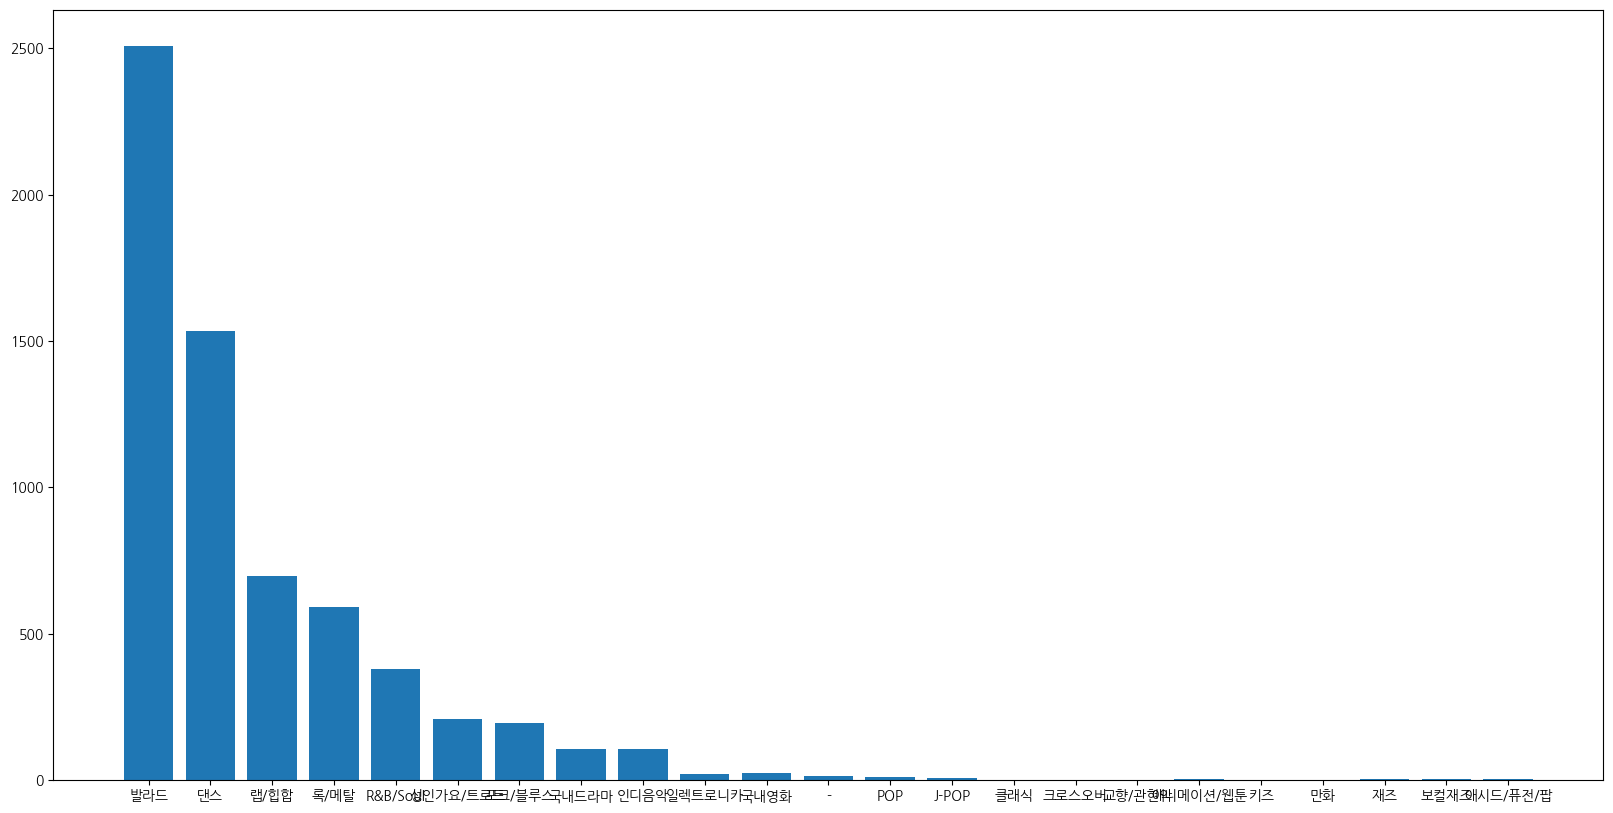

In [430]:
plt.figure(figsize=(20, 10))
plt.bar(genre_counts.keys(), genre_counts.values())

J-POP이나 클래식 같은건 또 다 빼야할 것으로 생각이 됨

In [431]:
sum(len(word) for word in re.findall(r'[가-힣]+', "힘들다 정말 집좀 보내주라 제발 GG"))

13

In [432]:
# 가사 당 한글 가사 길이 계산

# Count the number of Korean characters
songs_only['num_korean_total_syllable'] = songs_only['lyrics'].apply(lambda x: sum(len(word) for word in re.findall(r'[가-힣]+', x)))

# Count the number of Korean and English characters
songs_only['num_total_syllable'] = songs_only['lyrics'].apply(lambda x: sum(len(word) for word in re.findall(r'[가-힣]+|[a-zA-Z]+', x)))

# Check if the lyrics contain only Korean characters
songs_only['check_only_korean'] = songs_only['lyrics'].apply(lambda x: True if re.fullmatch(r'[\uac00-\ud7af\u1100-\u11ff\u3130-\u318f\uffa0-\uffdc\s]+', x) else False)

/tmp/ipykernel_1844387/1494649209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['num_korean_total_syllable'] = songs_only['lyrics'].apply(lambda x: sum(len(word) for word in re.findall(r'[가-힣]+', x)))
/tmp/ipykernel_1844387/1494649209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['num_total_syllable'] = songs_only['lyrics'].apply(lambda x: sum(len(word) for word in re.findall(r'[가-힣]+|[a-zA-Z]+', x)))
/tmp/ipykernel_1844387/1494649209.py:10: SettingWithCopyWarning: 
A value

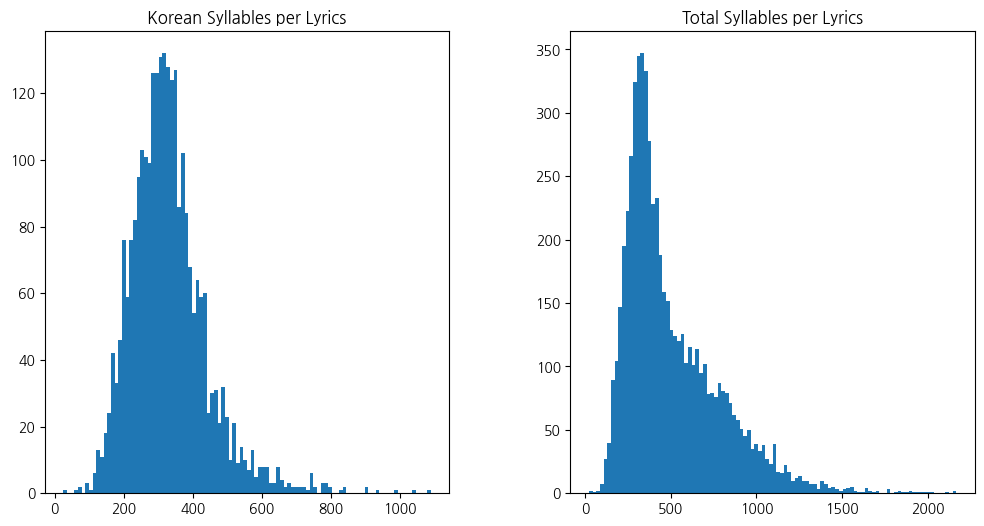

In [433]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of num_korean_total_syllable on the left subplot
ax1.hist(x=songs_only[songs_only['check_only_korean'] == True]['num_korean_total_syllable'], bins=100)
ax1.set_title('Korean Syllables per Lyrics')

# Plot the histogram of num_total_syllable on the right subplot
ax2.hist(x=songs_only['num_total_syllable'], bins=100)
ax2.set_title('Total Syllables per Lyrics')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

In [434]:
sum(songs_only[songs_only['check_only_korean'] == True]['num_korean_total_syllable']) / len(songs_only[songs_only['check_only_korean'] == True]['num_korean_total_syllable'])

330.8229398663697

- 우선은 한글 가사를 생성하는 것에 목적을 둠
    - 가사로부터 뭉치를 추출하는 것이 영어에 비해 훨씬 쉽기 때문 (글자수 = 뭉치)
- 하지만, 그렇다고 영어가 들어간 모든 가사를 훈련에 쓰지 못하는 것은 아님
    - 앞서 말했듯, 가사를 나눠서 샘플을 만들기 때문에, 영어가 들어간 부분만 제외하고 샘플을 만들 수 있음
- 그냥 쌩 가사 데이터의 분포보다도, 어떤 샘플링 방법을 채택했을 때, 가사가 어떻게 나누어져서 데이터셋이 어떤 분포를 띄고, 어떤 특징을 띄는 지가 중요함
    - **샘플이 납득할 수 있는 길이의 가사를 포함하는가?**

- 여기서 정의하길, rule-based로 안전하게 가사를 쪼갤 수 있는 기준은 스페이스(단어 단위)와 개행이 있다고 정의할 것
- 이 때, 스페이스 기준으로 자른 샘플은 납득 가능할 수 있는 정도의 길이의 가사를 포함하는가? NO
    - 길이도 너무 짧아지고,
    - 스페이스 기준으로 자른 것이 안전할 수 있다는 보장도 없음 (Ex. 이 곳에)
- 개행으로 자른 샘플은 납득 가능할 수 있는 정도의 길이의 가사를 포함하는가? 최소한도로서의 역할은 할 수 있을것이라고 생각 (직관적으로)
- 개행으로 자른 샘플이 최소 한도가 되도록 함(최소 한 샘플에 원래 가사의 한 줄 정도가 들어가도록 하고, 그 이상을 어떻게 골고루 채워줄 것인지 생각)
- 숨은 전제: 적어도 한 유저가 모델에 가사를 요청할 때는, 한 줄 정도는 요청할 것.
    - 유저마다 그 생각하는 최소 길이(한 줄)이 다르지 않을까요? -> watch this
- 실제 벅스 가사

## 2. 최소 단위, 개행

In [435]:
songs_only.columns

Index(['title', 'lyrics', 'genre', 'num_korean_total_syllable',
       'num_total_syllable', 'check_only_korean'],
      dtype='object')

In [436]:
# Initialize an empty list to hold the counts
counts = []
syllables_per_line = []
real_lines = []
songs_only['lines'] = songs_only['lyrics'].apply(lambda x: x.split('\n'))

# Iterate over each song
for lines in songs_only['lines']:
    syllables_for_this_line = list()
    real_line = list()
    # Iterate over each line in the song
    for line in lines:
        # Check if the line only contains Korean characters
        if re.fullmatch(r'[\uac00-\ud7af\u1100-\u11ff\u3130-\u318f\uffa0-\uffdc\s]+', line):
            real_line.append(line)
            # Count the number of Korean characters and add it to the list
            count = len([char for char in line if char != ' '])
            if count > 30:
                print(line)
                print(lines)
            counts.append(count)
            syllables_for_this_line.append(count)
    syllables_per_line.append(syllables_for_this_line)
    real_lines.append(real_line)
    
songs_only['syllables_per_line'] = syllables_per_line
songs_only['line_samples'] = real_lines

/tmp/ipykernel_1844387/2609047710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['lines'] = songs_only['lyrics'].apply(lambda x: x.split('\n'))
/tmp/ipykernel_1844387/2609047710.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['syllables_per_line'] = syllables_per_line
/tmp/ipykernel_1844387/2609047710.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [437]:
print(len(counts))
mean = sum(counts) / len(counts)
print(mean)

238920
9.176025447848652


(array([1.5900e+02, 5.8700e+02, 2.0460e+03, 5.4560e+03, 1.2739e+04,
        2.1007e+04, 3.0209e+04, 3.3574e+04, 3.0320e+04, 2.9027e+04,
        2.3278e+04, 2.1306e+04, 1.2989e+04, 7.8830e+03, 3.3520e+03,
        1.9080e+03, 9.2500e+02, 8.1600e+02, 4.8300e+02, 2.8400e+02,
        1.7500e+02, 1.2600e+02, 1.0600e+02, 7.2000e+01, 3.3000e+01,
        2.2000e+01, 1.7000e+01, 9.0000e+00, 1.2000e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30.]),
 <BarContainer object of 29 artists>)

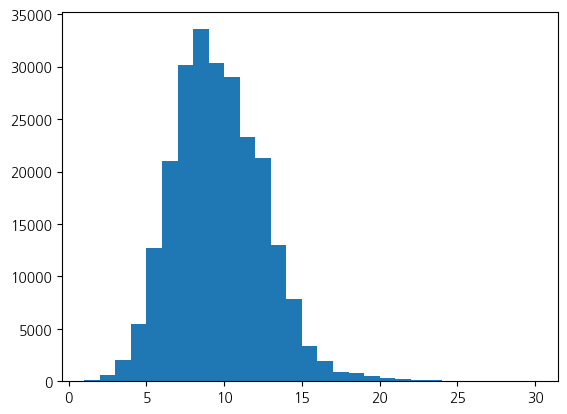

In [438]:
plt.hist(counts, bins=range(min(counts), max(counts) + 1)) 

- 한 줄에 평균적으로 9음절이 포함되어있음
- 한 줄을 요청 가사의 최소 길이로 생각한다면, 최소 평균 9음절을 요청하는 셈
- 단, 이는 훈련이 최소 9음절 이상인 샘플들로만 이루어지는 것을 뜻하는 것은 아님
- lowerbound의 평균이 9음절이 되는것
- 음절 단위로 '최소 9음절 이상만 학습하자!'가 아니라, 줄 단위로 '최소 한 줄 이상은 학습하자!'인 것이고, 이에 따라 각 노래마다 한 줄이라는 것이 다양하기 때문에 줄 단위로 끊었을 때 다양한 길이로 학습이 될 수 있고, 평균적으로 9음절을 생성하도록 하는 샘플로 학습이 되는 것! EASY!
- 단, 한 줄 단위로 자른 샘플이 한 곡에서 나오는 '최소' 길이의 샘플이니, rule-based하게 30을 기준으로 이보다 긴 한 줄이 있을 경우, 손수 잘라줬음
    - 몇 개 안 됨
    - 30 이상의 이상치 11곡은, 다른 사이트 참고해서 수정 함

## 3. 충분한가

- 가사를 전체 다 넣는 샘플만으로는 유저의 입력을 모두 커버할 수 없기에, 줄 단위로 잘라줬음
- 유저의 입력 길이는 아주 다양할 것, 그 중에 최소가 한 줄일 것으로 예상했고, 그렇게 했을 때 평균적을 9음절이 최소 샘플이 되게 함
    - 최소 치고 9 너무 길지 않나요?
    - "또 한 번 느껴지는 하루"
    - 말씀드렸듯, 평균이 9이고 훨씬 짧은 것도 훈련하게 된다
- 최소 단위고 줄 단위였다면, 최대 단위는 어떻게 될까?
- 너무나 당연하게도, 한 곡 전체가 최대일 것!    
    - 한 곡에 대해 유저는 최소 한 줄의 가사를 요청하고, 최대 한 곡의 가사를 요청한다 -> Trivial!
- 그래서 한 줄 짜리들 샘플도 만들어주고, 한 곡 짜리의 샘플도 만들어주기로 함.
- 이걸로 충분할까?

In [439]:
min_counts = counts
max_counts = songs_only[songs_only['check_only_korean'] == True]['num_korean_total_syllable'].to_list()

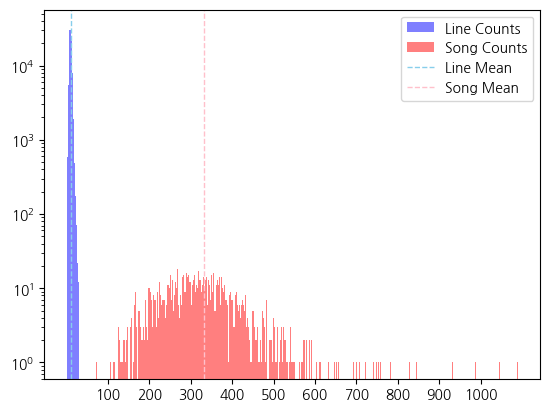

In [440]:
plt.hist(min_counts, bins=range(min(min_counts), max(min_counts) + 1), alpha=0.5, label='Line Counts', color='blue')
plt.hist(max_counts, bins=range(min(max_counts), max(max_counts) + 1), alpha=0.5, label='Song Counts', color='red')

plt.axvline(x=11, color='skyblue', linestyle='--', linewidth=1, label='Line Mean')
plt.axvline(x=333, color='pink', linestyle='--', linewidth=1, label='Song Mean')


plt.yscale('log')
plt.xticks(range(100, max(max_counts), 100))
plt.legend(loc='upper right')
plt.show()

- log scale로 ploting해봤음
- 짧은 길이의 샘플들이 더 많아야 한다는 것까지는 OK.
- 근데 지금의 이 상태로는, 중간이 너무 텅 빔
    - 이게 무슨 뜻이냐, 짧은 길이의 한 줄이나 긴 길이의 한 곡에 대한 대응밖에 못한다. 중간 출력을 못한다!
- 저 30부터 250정도 까지를 잘 채워줄 수 있는 데이터가 필요함
- 말로 풀어 설명하자면, 최소 단위인 줄 기준으로 자른 샘플과 최대 단위인 곡 전체를 사용하는 샘플만으로 학습하면, 그 중간 정도의 유저 입력에 대응할 수 없으니, 그 사이를 채울 수 있는 샘플을 만들어주자!

-----발표 제외-----

- 평균 한 줄의 음절 수가 9였고, 채워져야 하는 중간이 140 정도니까, 일단 rule-based로 14줄씩 합쳐주면 어떻게 될까?
    - 단 마지막 샘플은 14줄 아니어도 다 합쳐주되 한 줄은 아니어야 함

In [441]:
songs_only['line_samples']

0       [난 오늘도 조용히 그댈 그리워하네, 내 가슴 속깊이 여울져 남아 있네, 난 이밤도...
1       [나는 나는 갯바위, 당신은 나를 사랑하는 파도, 어느 고운 바람 불던날, 잔잔히 ...
2       [별이 유난히도 밝은, 오늘 이 시간이 가면, 그대, 이 밤 다가도록, 자꾸 귓가를...
3       [당신의 고운 눈매에 할말을 잊었지만은, 냉정히 돌아선 무정한 사람은 눈물을 모르겠...
4       [그대의 모습 멀어져갔네, 쓸쓸한 기억 남기고, 낭만이 지워진 그 길로, 조용히 멀...
                              ...                        
6085    [네 앞에선, 난 어질 어질 어질 두통, 또 돌고 돌아, 비상이 걸려, 버 버퍼링이...
6086    [우린 이 음악을 빌려, 이 분위기를 빌려, 지금 이 공기 이건 마치, 낯선 과일 ...
6087    [사랑이었다 별거 없던 내 하루에, 빛이 돼준 단한 사람, 나보다 나를 더 아껴 주...
6088    [바람에 날려 꽃이 지는 계절엔, 아직도 너의 손을 잡은 듯 그런 듯 해, 그때는 ...
6089    [난 지금 널 향해 달려가고 있어, 숨이 턱까지 차올라 괜찮아, 잠시 후 널 마주할...
Name: line_samples, Length: 6090, dtype: object

In [442]:
songs_only['mid_14_sample'] = songs_only['line_samples'].apply(
    lambda lines: ['\n'.join(lines[i:i+14]) for i in range(0, len(lines), 14) if len(lines[i:i+14]) != 1]
)
songs_only['mid_14_sample']

/tmp/ipykernel_1844387/2671436761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['mid_14_sample'] = songs_only['line_samples'].apply(


0       [난 오늘도 조용히 그댈 그리워하네\n내 가슴 속깊이 여울져 남아 있네\n난 이밤도...
1       [나는 나는 갯바위\n당신은 나를 사랑하는 파도\n어느 고운 바람 불던날\n잔잔히 ...
2       [별이 유난히도 밝은\n오늘 이 시간이 가면\n그대\n이 밤 다가도록\n자꾸 귓가를...
3       [당신의 고운 눈매에 할말을 잊었지만은\n냉정히 돌아선 무정한 사람은 눈물을 모르겠...
4       [그대의 모습 멀어져갔네\n쓸쓸한 기억 남기고\n낭만이 지워진 그 길로\n조용히 멀...
                              ...                        
6085    [네 앞에선\n난 어질 어질 어질 두통\n또 돌고 돌아\n비상이 걸려\n버 버퍼링이...
6086    [우린 이 음악을 빌려\n이 분위기를 빌려\n지금 이 공기 이건 마치\n낯선 과일 ...
6087    [사랑이었다 별거 없던 내 하루에\n빛이 돼준 단한 사람\n나보다 나를 더 아껴 주...
6088    [바람에 날려 꽃이 지는 계절엔\n아직도 너의 손을 잡은 듯 그런 듯 해\n그때는 ...
6089    [난 지금 널 향해 달려가고 있어\n숨이 턱까지 차올라 괜찮아\n잠시 후 널 마주할...
Name: mid_14_sample, Length: 6090, dtype: object

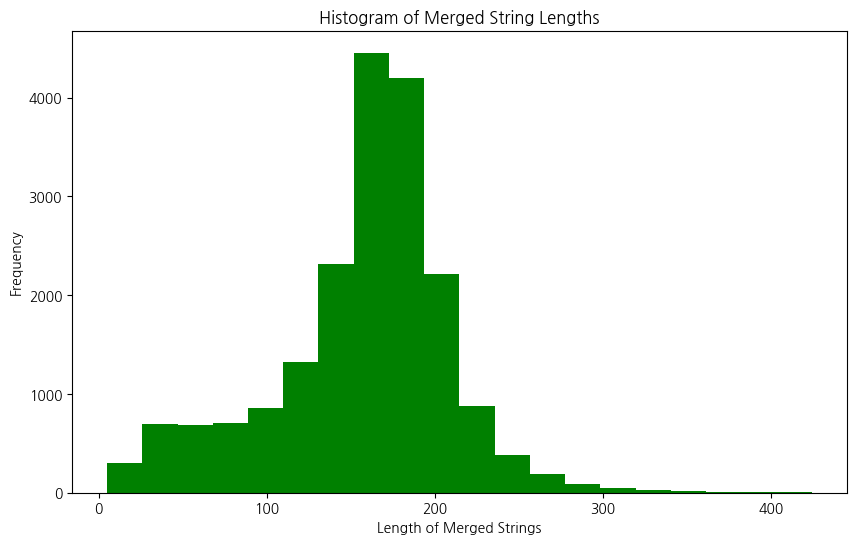

156.7483003708282


In [443]:
# Flatten the list of lists and calculate the length of each merged string
merged_lengths = [len(sample) for sublist in songs_only['mid_14_sample'] for sample in sublist]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_lengths, bins=20, color='green')
plt.title('Histogram of Merged String Lengths')
plt.xlabel('Length of Merged Strings')
plt.ylabel('Frequency')
plt.show()
print(sum(merged_lengths)/len(merged_lengths))

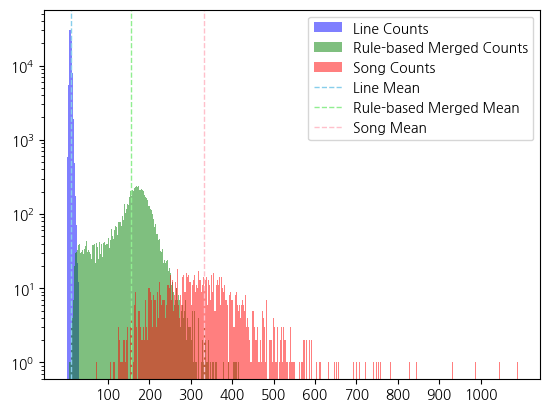

In [444]:
plt.hist(min_counts, bins=range(min(min_counts), max(min_counts) + 1), alpha=0.5, label='Line Counts', color='blue')
plt.hist(merged_lengths, bins=range(min(merged_lengths), max(merged_lengths) + 1), alpha=0.5, label='Rule-based Merged Counts', color='green')
plt.hist(max_counts, bins=range(min(max_counts), max(max_counts) + 1), alpha=0.5, label='Song Counts', color='red')

plt.axvline(x=11, color='skyblue', linestyle='--', linewidth=1, label='Line Mean')
plt.axvline(x=156, color='lightgreen', linestyle='--', linewidth=1, label='Rule-based Merged Mean')
plt.axvline(x=333, color='pink', linestyle='--', linewidth=1, label='Song Mean')


plt.yscale('log')
plt.xticks(range(100, max(max_counts), 100))
plt.legend(loc='upper right')
plt.show()

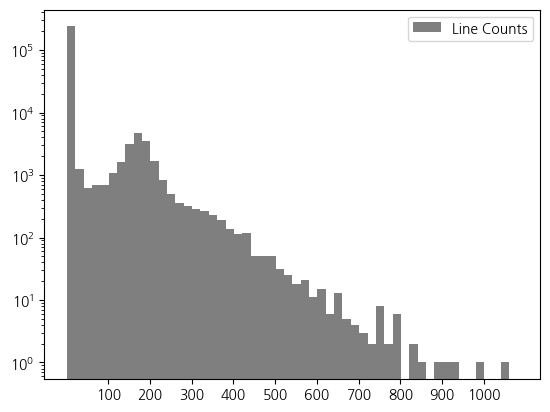

In [445]:
rule_based_total = min_counts + max_counts + merged_lengths

plt.hist(rule_based_total, bins=range(min(rule_based_total), max(rule_based_total) + 1,20), alpha=0.5, label='Line Counts', color='black')

plt.yscale('log')
plt.xticks(range(100, max(rule_based_total), 100))
plt.legend(loc='upper right')
plt.show()

- 뭐 이렇게 할 수도 있긴 한데, 좀 더 한 줄과 한 노래 사이의 더 그럴듯한, 즉 통계적으로 14줄 이게 아니라, 좀 잘라도 될법한 곳을 찾아보면 어떨까?
- 생각해보니, 노래는 그 특징상 반복 구절을 포함하는 경우들이 있다

-----발표제외-----

- 노래 한 줄과 노래 하나 사이의 의미 있는 단위? -> 절!
- 절 어떻게 찾지?
    - 후렴을 찾으면 절을 찾을 수 있다고 가정

In [446]:
input_string1="""네가 없이 웃을 수 있을까
생각만 해도 눈물이나
힘든 시간 날 지켜준 사람
이제는 내가 그댈 지킬 테니
너의 품은 항상 따뜻했어
고단했던 나의 하루에
유일한 휴식처
나는 너 하나로 충분해
긴 말 안 해도 눈빛으로 다 아니깐
한 송이의 꽃이 피고 지는
모든 날 모든 순간 함께해
햇살처럼 빛나고 있었지
나를 보는 네 눈빛은
꿈이라고 해도 좋을 만큼
그 모든 순간은 눈부셨다
불안했던 나의 고된 삶에
한줄기 빛처럼 다가와
날 웃게 해준 너
나는 너 하나로 충분해
긴 말 안 해도 눈빛으로 다 아니깐
한 송이의 꽃이 피고 지는
모든 날 모든 순간 함께해
알 수 없는 미래지만
네 품속에 있는 지금 순간 순간이
영원 했으면 해
갈게 바람이 좋은 날에
햇살 눈부신 어떤 날에 너에게로
처음 내게 왔던 그날처럼
모든 날 모든 순간 함께해"""

input_string2="""이 밤 그날의 반딧불을
당신의 창 가까이 보낼게요
음 사랑한다는 말이에요
나 우리의 첫 입맞춤을 떠올려
그럼 언제든 눈을 감고
음 가장 먼 곳으로 가요
난 파도가 머물던
모래 위에 적힌 글씨처럼
그대가 멀리 사라져 버릴 것 같아
늘 그리워 그리워
여기 내 마음속에
모든 말을 다 꺼내어 줄 순 없지만
사랑한다는 말이에요
어떻게 나에게
그대란 행운이 온 걸까
지금 우리 함께 있다면 아
얼마나 좋을까요
난 파도가 머물던
모래 위에 적힌 글씨처럼
그대가 멀리 사라져 버릴 것 같아
또 그리워 더 그리워
나의 일기장 안에
모든 말을 다 꺼내어 줄 순 없지만
사랑한다는 말
이 밤 그날의 반딧불을 당신의
창 가까이 띄울게요
음 좋은 꿈 이길 바라요"""

input_string3="""흔들리는 꽃들 속에서
네 샴푸향이 느껴진거야
스쳐지나간건가 뒤돌아보지만
그냥 사람들만 보이는거야
다와가는 집근처에서
괜히 핸드폰만 만지는거야
한번 연락해 볼까 용기내 보지만
그냥 내 마음만 아쉬운 거야
걷다가 보면 항상 이렇게 너를
바라만 보던 너를
기다린다고 말할까
지금 집앞에 계속 이렇게 너를
아쉬워 하다 너를 연락했다 할까
지나치는 꽃들 속에서
네 샴푸향만 보이는거야
스쳐지나간건가 뒤 돌아보지만
그냥 내 마음만 바빠진거야
걷다가 보면 항상 이렇게 너를
바라만 보던 너를
기다린다고 말할까
지금 집앞에 계속 이렇게 너를
아쉬워 하다 너를 연락했다 할까
어떤 계절이 너를
우연히라도 너를 마주치게 할까
난 이대로 아쉬워하다
너를 바라만 보던 너를
기다리면서 아무말 못하고
그리워만 할까
걷다가 보면 항상 이렇게 너를
바라만 보던 너를
생각한다고 말할까
지금 집앞에 기다리고
때론 지나치고 다시 기다리는
꽃이 피는 거리에 보고파라 이밤에
걷다가 보면 항상 이렇게 너를
아쉬워 하다 너를
기다린다고 말할까
지금 집앞에 계속 이렇게 너를
아쉬워 하다 너를 연락했다 할까"""

In [447]:
import itertools

def find_pseudo_chorus(lines):
    subsequences = defaultdict(list)

    max_len = len(lines) // 2

    for length in range(1, max_len):
        for start in range(len(lines) - length + 1):
            subseq = tuple(lines[start:start+length])
            subsequences[subseq].append(start)

    def are_indices_disjoint(indices, length):
        for i, j in itertools.combinations(indices, 2):
            if not (j >= i + length or i >= j + length):
                return False
        return True
    longest_common = []
    for subseq, indices in subsequences.items():
        if len(indices) > 1 and are_indices_disjoint(indices, len(subseq)):
            if not longest_common or len(subseq) > len(longest_common[0]):
                longest_common = [subseq]
            elif len(subseq) == len(longest_common[0]):
                longest_common.append(subseq)

    return [list(subseq) for subseq in longest_common]

# Example usage
lines = [i for i in input_string2.split('\n') if i]
chorus = find_pseudo_chorus(lines)
print("The lines with the highest frequency are:", chorus)

The lines with the highest frequency are: [['난 파도가 머물던', '모래 위에 적힌 글씨처럼', '그대가 멀리 사라져 버릴 것 같아']]


In [448]:
from collections import defaultdict
from fuzzywuzzy import fuzz

def find_pseudo_chorus_fuzzy(lines, similarity_threshold=90):
    subsequences = defaultdict(list)
    max_len = len(lines) // 2

    # Collect potential subsequences
    for length in range(1, max_len):
        for start in range(len(lines) - length + 1):
            subseq = tuple(lines[start:start + length])
            subsequences[subseq].append(start)

    # Check for fuzzy similarity among subsequences
    def are_fuzzily_similar(subseq1, subseq2, threshold):
        str1 = " ".join(subseq1)
        str2 = " ".join(subseq2)
        return fuzz.ratio(str1, str2) >= threshold

    # Check if indices are disjoint
    def are_indices_disjoint(indices, length):
        sorted_indices = sorted(indices)
        return all(sorted_indices[i] + length <= sorted_indices[i + 1] for i in range(len(sorted_indices) - 1))
    # Identify the longest common disjoint subsequences with fuzzy matching
    common_list = []
    for subseq1 in subsequences:
        for subseq2 in subsequences:
            if subseq1 != subseq2 and are_fuzzily_similar(subseq1, subseq2, similarity_threshold):
                combined_indices = subsequences[subseq1] + subsequences[subseq2]
                if are_indices_disjoint(combined_indices, min(len(subseq1), len(subseq2))):
                    common_list.append((subseq1, subseq2))  # Store pairs for example
    common_list = [list(subseq) for subseq, _ in common_list]
    if not common_list:
        return []

    max_length = max(len(subseq) for subseq in common_list)
    return [list(subseq) for subseq in common_list if len(subseq) == max_length]

# lines = [i for i in input_string2.split('\n') if i]
# chorus = find_pseudo_chorus_fuzzy(lines)
# print("The lines with the highest frequency are:", chorus)

In [449]:
def merge_with_chorus(lines, chorus):
    pivot_tuples = [tuple(sublist) for sublist in chorus]

    pivot_ends = []
    i = 0
    while i < len(lines):
        for pivot in pivot_tuples:
            pivot_len = len(pivot)
            if i + pivot_len <= len(lines) and tuple(lines[i:i+pivot_len]) == pivot:
                pivot_ends.append(i + pivot_len) 
                i += pivot_len - 1 
                break
        i += 1
    if pivot_ends[-1] != len(lines):
        pivot_ends.append(len(lines))

    results = []
    start_index = 0
    for end_index in pivot_ends:
        segment = "\n".join(lines[start_index:end_index])
        results.append(segment)
        start_index = end_index 

    return results

# Call the function and print the result
segmented_result = merge_with_chorus(lines, chorus)
print(segmented_result)

['이 밤 그날의 반딧불을\n당신의 창 가까이 보낼게요\n음 사랑한다는 말이에요\n나 우리의 첫 입맞춤을 떠올려\n그럼 언제든 눈을 감고\n음 가장 먼 곳으로 가요\n난 파도가 머물던\n모래 위에 적힌 글씨처럼\n그대가 멀리 사라져 버릴 것 같아', '늘 그리워 그리워\n여기 내 마음속에\n모든 말을 다 꺼내어 줄 순 없지만\n사랑한다는 말이에요\n어떻게 나에게\n그대란 행운이 온 걸까\n지금 우리 함께 있다면 아\n얼마나 좋을까요\n난 파도가 머물던\n모래 위에 적힌 글씨처럼\n그대가 멀리 사라져 버릴 것 같아', '또 그리워 더 그리워\n나의 일기장 안에\n모든 말을 다 꺼내어 줄 순 없지만\n사랑한다는 말\n이 밤 그날의 반딧불을 당신의\n창 가까이 띄울게요\n음 좋은 꿈 이길 바라요']


- 적당하게 잘 쪼개지는 것을 확인할 수 있음
- fuzzy하게 중복 제거를 해줘야 할까 생각이 들지만, 일단은 냅두자

In [450]:
def check_chorus(lines):
    if (pseudo_chorus := find_pseudo_chorus(lines)):
        return True
    else:
        return False

In [451]:
songs_only['line_samples'].apply(lambda row: check_chorus(row)).value_counts()

line_samples
True     5751
False     339
Name: count, dtype: int64

In [452]:
def merging_lines(lines):
    if (pseudo_chorus := find_pseudo_chorus(lines)):
        return [i for i in merge_with_chorus(lines, pseudo_chorus) if '\n' in i]
    else:
        return []

In [453]:
songs_only['verse_samples'] = songs_only['line_samples'].apply(lambda row: merging_lines(row))

/tmp/ipykernel_1844387/533586291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['verse_samples'] = songs_only['line_samples'].apply(lambda row: merging_lines(row))


In [454]:
for i in songs_only['verse_samples'].sample(3):
    print(i)
    print(len(i))

['미스 고 미스 고\n나는 너를 사랑했었다\n짧은순간 내가슴에 머물다간\n그흔적 너무크더라\n시인처럼 사랑하고\n시인처럼 스쳐간 너\n계곡처럼 깊이패인\n그리움만 남긴 너\n미스 고 미스 고\n나는 나는 사랑의 삐에로', '미스 고 미스 고\n나는 너를 잊지 못했다\n짧은순간 내가슴에 머물다간\n그흔적 너무깊더라\n시인처럼 사랑하고\n시인처럼 가버린 너\n계곡처럼 깊이패인\n그리움만 남긴 너\n미스 고 미스 고\n나는 나는 사랑의 삐에로']
2
['나쁜 짓을 저질렀어요\n그렇게 놀란 눈으로 날 보지 마요\n여기서 다 털어 놓을까요\n어젯밤 그대 전화 왜 안 받았게요\n사실 부족해 이걸론\n너무 당혹스런 너의 그 표정\n누가 더 니가 내가 나쁠까\n나한테 잘 걸렸어 너 말이야\n누가 더 니가 내가 아플까\n그렇게 살지 마라 너 말이야\n혼자 보긴 너무 아까운 일이야\n너의 무너진 모습\n이제 시작이야 아직 먼 길이야\n조금 더 배워야 돼 너 말이야', '왜 나에게 이러시나요\n그 말이 그대 입에\n오를 말인가요\n여기서 다 털어볼까요\n그대가 누구 누구 누굴 울렸는지\n지금까지 너 만만하게만\n상대했던 얼굴 반반한 애완\n달라 나 준비한 반의\n반의 반도 안 한 거야\n네 재판 하나 둘 셋 넷 이리 온\n내가 열을 세기 전에 어서 온\n내게 빌지 마 아직은\n아니 벌써부터 울 것 까지야\n누가 더 니가 내가 나쁠까\n나한테 잘 걸렸어 너 말이야\n누가 더 니가 내가 아플까\n그렇게 살지 마라 너 말이야\n혼자 보긴 너무 아까운 일이야\n너의 무너진 모습\n이제 시작이야 아직 먼 길이야\n조금 더 배워야 돼 너 말이야', '있는 힘 다 해서 멀리 뛰어가\n비참한 니 모습\n영원히 기억할게\n뛰어 달아나 숨이 찰 때까지\n모든 건 단 하나 니가 한 댓가지\n너 좀 바라 봐 미칠 것만 같지\n눈물에 콧물에 꼴 한 번 사납지\n이거는 알아둬\n니가 내게 줬던\n모멸과 수치에 비하면\n어림 반 푼어치도 아냐\n그러니까 애처럼 울지 좀 마\n이대로 이야기가 끝일까\n마음

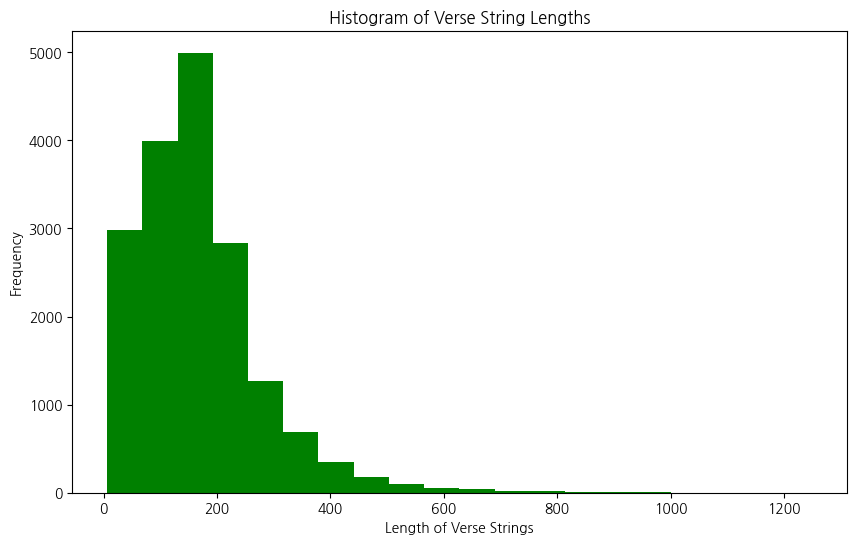

167.9417226842885


In [455]:
# Flatten the list of lists and calculate the length of each verse string
verse_lengths = [len(sample) for sublist in songs_only['verse_samples'] for sample in sublist if sublist]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(verse_lengths, bins=20, color='green')
plt.title('Histogram of Verse String Lengths')
plt.xlabel('Length of Verse Strings')
plt.ylabel('Frequency')
plt.show()
print(sum(verse_lengths)/len(verse_lengths))

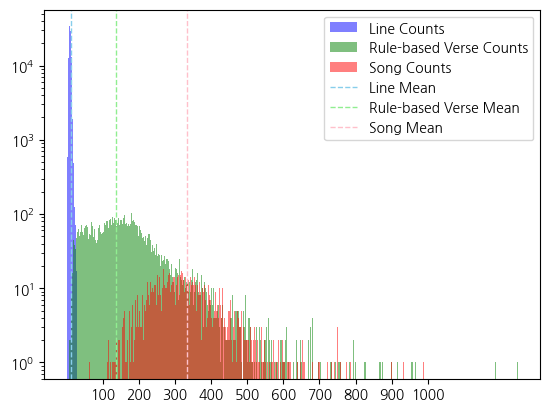

In [456]:
plt.hist(min_counts, bins=range(min(min_counts), max(min_counts) + 1), alpha=0.5, label='Line Counts', color='blue')
plt.hist(verse_lengths, bins=range(min(verse_lengths), max(verse_lengths) + 1), alpha=0.5, label='Rule-based Verse Counts', color='green')
plt.hist(max_counts, bins=range(min(max_counts), max(max_counts) + 1), alpha=0.5, label='Song Counts', color='red')

plt.axvline(x=11, color='skyblue', linestyle='--', linewidth=1, label='Line Mean')
plt.axvline(x=137, color='lightgreen', linestyle='--', linewidth=1, label='Rule-based Verse Mean')
plt.axvline(x=333, color='pink', linestyle='--', linewidth=1, label='Song Mean')


plt.yscale('log')
plt.xticks(range(100, max(max_counts), 100))
plt.legend(loc='upper right')
plt.show()

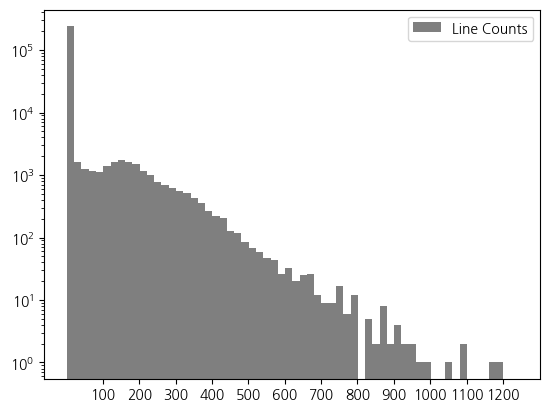

In [457]:
rule_based_total = min_counts + max_counts + verse_lengths

plt.hist(rule_based_total, bins=range(min(rule_based_total), max(rule_based_total) + 1, 20), alpha=0.5, label='Line Counts', color='black')

plt.yscale('log')
plt.xticks(range(100, max(rule_based_total), 100))
plt.legend(loc='upper right')
plt.show()

- 그래도 훨씬 이쁘져?

## 4. 이제 반 왔다. 뭉치 어떻게 할래

In [458]:
songs_only.columns

Index(['title', 'lyrics', 'genre', 'num_korean_total_syllable',
       'num_total_syllable', 'check_only_korean', 'lines',
       'syllables_per_line', 'line_samples', 'mid_14_sample', 'verse_samples'],
      dtype='object')

In [459]:
for _, row in songs_only[songs_only['check_only_korean']==True][['title', 'lines', 'verse_samples', 'lyrics']].sample(5).iterrows():
    print(len(row['lines']))
    print(len(row['verse_samples']))
    print(1)
    print('-'*10)

26
3
1
----------
49
3
1
----------
50
4
1
----------
40
3
1
----------
25
3
1
----------


- 앞서 얘기했던 것처럼 뭉치를 단어 단위 / 줄단위로 만들어준다고 생각하면 모델이 추론하게 되는 뭉치의 분포는 어떻게 되는가?

In [460]:
songs_only.drop(columns=['num_korean_total_syllable', 'num_total_syllable', 'syllables_per_line', 'lines', 'mid_14_sample'], inplace=True)
songs_only['total_samples'] = songs_only['lyrics'].apply(lambda x: [x])

/tmp/ipykernel_1844387/4256288938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only.drop(columns=['num_korean_total_syllable', 'num_total_syllable', 'syllables_per_line', 'lines', 'mid_14_sample'], inplace=True)
/tmp/ipykernel_1844387/4256288938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['total_samples'] = songs_only['lyrics'].apply(lambda x: [x])


In [461]:
songs_only.sample(5)

,title,lyrics,genre,check_only_korean,line_samples,verse_samples,total_samples
4,물같은 사랑,그대의 모습 멀어져갔네\n쓸쓸한 기억 남기고\n낭만이 지워진 그 길로\n조용히 멀어...,성인가요/트로트,True,"[그대의 모습 멀어져갔네, 쓸쓸한 기억 남기고, 낭만이 지워진 그 길로, 조용히 멀...",[그대의 모습 멀어져갔네\n쓸쓸한 기억 남기고\n낭만이 지워진 그 길로\n조용히 멀...,[그대의 모습 멀어져갔네\n쓸쓸한 기억 남기고\n낭만이 지워진 그 길로\n조용히 멀...
3613,넌센스 (Nonsense),가지마 가지마\n가지마 가지마\n진실된 사랑을 넌 아니\n이제와 남은 후회만이\no...,댄스,False,"[가지마 가지마, 가지마 가지마, 진실된 사랑을 넌 아니, 이제와 남은 후회만이, ...",[가지마 가지마\n가지마 가지마\n진실된 사랑을 넌 아니\n이제와 남은 후회만이\n...,[가지마 가지마\n가지마 가지마\n진실된 사랑을 넌 아니\n이제와 남은 후회만이\n...
2110,꿈에,어떤말을 해야하는지 난 너무 가슴이 떨려서\n우리 옛날 그대로의 모습으로 만나고 있...,발라드,False,"[어떤말을 해야하는지 난 너무 가슴이 떨려서, 우리 옛날 그대로의 모습으로 만나고 ...",[],[어떤말을 해야하는지 난 너무 가슴이 떨려서\n우리 옛날 그대로의 모습으로 만나고 ...
1964,고백,사랑해요 그대\n이젠 내가 아닌 그대지만\n사랑해요 그대\n만질 수도 없는 사람이지...,발라드,False,"[사랑해요 그대, 이젠 내가 아닌 그대지만, 사랑해요 그대, 만질 수도 없는 사람이...",[사랑해요 그대\n이젠 내가 아닌 그대지만\n사랑해요 그대\n만질 수도 없는 사람이...,[사랑해요 그대\n이젠 내가 아닌 그대지만\n사랑해요 그대\n만질 수도 없는 사람이...
5126,슈퍼스타 (Prod. by D.O),Hello my name K I S U M\n뮤직 거꾸로 뒤집어 M U S I K\...,랩/힙합,False,"[난 준비됐어, 모두를 놀래킬 준비 백퍼, 쇼미 돈을 거쳐, 언랩이 내게 부와 명예...",[난 준비됐어\n모두를 놀래킬 준비 백퍼\n쇼미 돈을 거쳐\n언랩이 내게 부와 명예...,[Hello my name K I S U M\n뮤직 거꾸로 뒤집어 M U S I K...


In [462]:
def count_korean_letters(text):
    pattern = r'[\uac00-\ud7af\u1100-\u11ff\u3130-\u318f\uffa0-\uffdc]'
    
    korean_letters = re.findall(pattern, text)
    
    return len(korean_letters)

In [463]:
line_samples_word_mungchi_label = []
line_samples_line_mungchi_label = []
verse_samples_word_mungchi_label = []
verse_samples_line_mungchi_label = []
total_samples_word_mungchi_label = []
total_samples_line_mungchi_label = []

for _, row in tqdm(songs_only.iterrows()):
    line_samples = [re.sub('\s{2,}',' ', re.sub(r'[^\uac00-\ud7af\s]', '', i).strip()) for i in row['line_samples']]
    line_samples = [i for i in line_samples if i]
    line_samples_word_mungchi_label.append([' / '.join(i.split()) for i in line_samples])
    line_samples_line_mungchi_label.append(line_samples)
    
    if row['verse_samples']:
        verse_samples = [re.sub(r'[^\uac00-\ud7af\s]', '', i) for i in row['verse_samples']]
        verse_samples = [i for i in verse_samples if i]
        verse_samples_word_mungchi_label.append([' / '.join(i.split()) for i in verse_samples])
        verse_samples_line_mungchi_label.append([' / '.join(i.split('\n')) for i in verse_samples])
    else:
        verse_samples_word_mungchi_label.append([])
        verse_samples_line_mungchi_label.append([])
        
    if row['check_only_korean']:
        total_samples = [re.sub(r'[^\uac00-\ud7af\s]', '', i) for i in row['total_samples']]
        total_samples = [i for i in total_samples if i]
        total_samples_word_mungchi_label.append([' / '.join(i.split()) for i in total_samples])
        total_samples_line_mungchi_label.append([' / '.join(i.split('\n')) for i in total_samples])
    else:
        total_samples_word_mungchi_label.append([])
        total_samples_line_mungchi_label.append([])        

0it [00:00, ?it/s]

In [464]:
len(total_samples_word_mungchi_label)

6090

In [465]:
print(line_samples_word_mungchi_label[100],
line_samples_line_mungchi_label[100],
verse_samples_word_mungchi_label[100],
verse_samples_line_mungchi_label[100],
total_samples_word_mungchi_label[100],
total_samples_line_mungchi_label[100])


['야윈 / 어깨로 / 흘러내리는', '너무 / 슬픈 / 미련 / 때문에', '나 / 여기까지 / 그댈 / 찾아서 / 왔어요', '유리 / 창 / 밖엔 / 바람이 / 불고', '아름다운 / 연인들끼리', '추억 / 속으로 / 걸어가는걸 / 보았죠', '너무나 / 사랑했기 / 때문에', '잊을 / 수가 / 없어요', '지난날들이 / 아름다워요', '너무나 / 행복했기 / 때문에', '지울 / 수가 / 없어요', '이 / 내 / 가슴이 / 멍들어도', '그대 / 꿈속이라도 / 한번', '다시 / 만나 / 볼 / 수 / 있다면', '그대 / 이 / 내 / 영혼을 / 태워', '다시 / 사랑할 / 수 / 있다면', '너무나 / 사랑했기 / 때문에', '잊을 / 수가 / 없어요', '지난날들이 / 아름다워요', '너무나 / 행복했기 / 때문에', '지울 / 수가 / 없어요', '이 / 내 / 가슴이 / 멍들어도', '그대 / 꿈속이라도 / 한번', '다시 / 만나 / 볼 / 수 / 있다면', '그대 / 이 / 내 / 영혼을 / 태워', '다시 / 사랑할 / 수 / 있다면'] ['야윈 어깨로 흘러내리는', '너무 슬픈 미련 때문에', '나 여기까지 그댈 찾아서 왔어요', '유리 창 밖엔 바람이 불고', '아름다운 연인들끼리', '추억 속으로 걸어가는걸 보았죠', '너무나 사랑했기 때문에', '잊을 수가 없어요', '지난날들이 아름다워요', '너무나 행복했기 때문에', '지울 수가 없어요', '이 내 가슴이 멍들어도', '그대 꿈속이라도 한번', '다시 만나 볼 수 있다면', '그대 이 내 영혼을 태워', '다시 사랑할 수 있다면', '너무나 사랑했기 때문에', '잊을 수가 없어요', '지난날들이 아름다워요', '너무나 행복했기 때문에', '지울 수가 없어요', '이 내 가슴이 멍들어도', '그대 꿈속이라도 한번', '다시 만나 볼 수 있다면', '그대 이 내 영혼을 태워', '다시 사랑할 수 있다면'] ['야윈 / 어깨로 / 흘러내리는 / 너무 / 슬픈 / 미련 / 때문

In [493]:
line_samples = 0
verse_samples = 0
song_samples = 0

line_samples_word_mungchi_input = []
line_samples_line_mungchi_input = []
verse_samples_word_mungchi_input = []
verse_samples_line_mungchi_input = []
total_samples_word_mungchi_input = []
total_samples_line_mungchi_input = []

for labels_word, labels_line in tqdm(zip(
    line_samples_word_mungchi_label, 
    line_samples_line_mungchi_label
)):
    if labels_word and labels_line:
        line_samples_word_mungchi_input.append([[cnt if (cnt:=count_korean_letters(l)) else print("lw", labels_word) for l in label.split(' / ')] for label in labels_word])
        line_samples_line_mungchi_input.append([[cnt if (cnt:=count_korean_letters(l)) else print("ll", labels_line) for l in label.split(' / ')] for label in labels_line])
        line_samples += len(labels_word)+len(labels_line)
    else:
        line_samples_word_mungchi_input.append([])
        line_samples_line_mungchi_input.append([])
    
for labels_verse_word, labels_verse_line in tqdm(zip(
    verse_samples_word_mungchi_label, 
    verse_samples_line_mungchi_label, 
)):
    if labels_verse_word and labels_verse_line:
        verse_samples_word_mungchi_input.append([[cnt if (cnt:=count_korean_letters(l)) else print("mw", labels_verse_word) for l in label.split(' / ')] for label in labels_verse_word])
        verse_samples_line_mungchi_input.append([[cnt if (cnt:=count_korean_letters(l)) else print("ml", labels_verse_line) for l in label.split(' / ')] for label in labels_verse_line])
        verse_samples += len(labels_verse_word)+len(labels_verse_line)
    else:
        verse_samples_word_mungchi_input.append([])
        verse_samples_line_mungchi_input.append([])
        
for labels_total_word, labels_total_line in tqdm(zip(
    total_samples_word_mungchi_label, 
    total_samples_line_mungchi_label
)):
    if labels_total_word and labels_total_line:
        total_samples_word_mungchi_input.append([[cnt if (cnt:=count_korean_letters(l)) else print("tw", labels_total_word) for l in label.split(' / ')] for label in labels_total_word])
        total_samples_line_mungchi_input.append([[cnt if (cnt:=count_korean_letters(l)) else print("tl", labels_total_line) for l in label.split(' / ')] for label in labels_total_line])
        song_samples += len(labels_total_word)+len(labels_total_line)
    else:
        total_samples_word_mungchi_input.append([])
        total_samples_line_mungchi_input.append([])

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [494]:
print(f"""line_samples: {line_samples}
      verse_sampels: {verse_samples}
      song_samples: {song_samples}
      total: {line_samples+verse_samples+song_samples}""")

line_samples: 477840
      verse_sampels: 35108
      song_samples: 5388
      total: 518336


In [482]:
print(line_samples_word_mungchi_input[100])
print(line_samples_word_mungchi_label[100])

[[2, 3, 5], [2, 2, 2, 3], [1, 4, 2, 3, 3], [2, 1, 2, 3, 2], [4, 5], [2, 3, 5, 3], [3, 4, 3], [2, 2, 3], [5, 5], [3, 4, 3], [2, 2, 3], [1, 1, 3, 4], [2, 5, 2], [2, 2, 1, 1, 3], [2, 1, 1, 3, 2], [2, 3, 1, 3], [3, 4, 3], [2, 2, 3], [5, 5], [3, 4, 3], [2, 2, 3], [1, 1, 3, 4], [2, 5, 2], [2, 2, 1, 1, 3], [2, 1, 1, 3, 2], [2, 3, 1, 3]]
['야윈 / 어깨로 / 흘러내리는', '너무 / 슬픈 / 미련 / 때문에', '나 / 여기까지 / 그댈 / 찾아서 / 왔어요', '유리 / 창 / 밖엔 / 바람이 / 불고', '아름다운 / 연인들끼리', '추억 / 속으로 / 걸어가는걸 / 보았죠', '너무나 / 사랑했기 / 때문에', '잊을 / 수가 / 없어요', '지난날들이 / 아름다워요', '너무나 / 행복했기 / 때문에', '지울 / 수가 / 없어요', '이 / 내 / 가슴이 / 멍들어도', '그대 / 꿈속이라도 / 한번', '다시 / 만나 / 볼 / 수 / 있다면', '그대 / 이 / 내 / 영혼을 / 태워', '다시 / 사랑할 / 수 / 있다면', '너무나 / 사랑했기 / 때문에', '잊을 / 수가 / 없어요', '지난날들이 / 아름다워요', '너무나 / 행복했기 / 때문에', '지울 / 수가 / 없어요', '이 / 내 / 가슴이 / 멍들어도', '그대 / 꿈속이라도 / 한번', '다시 / 만나 / 볼 / 수 / 있다면', '그대 / 이 / 내 / 영혼을 / 태워', '다시 / 사랑할 / 수 / 있다면']


In [483]:
print(line_samples_line_mungchi_input[100])
print(line_samples_line_mungchi_label[100])

[[10], [9], [13], [10], [9], [13], [10], [7], [10], [10], [7], [9], [9], [9], [9], [9], [10], [7], [10], [10], [7], [9], [9], [9], [9], [9]]
['야윈 어깨로 흘러내리는', '너무 슬픈 미련 때문에', '나 여기까지 그댈 찾아서 왔어요', '유리 창 밖엔 바람이 불고', '아름다운 연인들끼리', '추억 속으로 걸어가는걸 보았죠', '너무나 사랑했기 때문에', '잊을 수가 없어요', '지난날들이 아름다워요', '너무나 행복했기 때문에', '지울 수가 없어요', '이 내 가슴이 멍들어도', '그대 꿈속이라도 한번', '다시 만나 볼 수 있다면', '그대 이 내 영혼을 태워', '다시 사랑할 수 있다면', '너무나 사랑했기 때문에', '잊을 수가 없어요', '지난날들이 아름다워요', '너무나 행복했기 때문에', '지울 수가 없어요', '이 내 가슴이 멍들어도', '그대 꿈속이라도 한번', '다시 만나 볼 수 있다면', '그대 이 내 영혼을 태워', '다시 사랑할 수 있다면']


In [484]:
print(verse_samples_word_mungchi_input[100])
print(verse_samples_word_mungchi_label[100])

[[2, 2, 3, 5, 2, 3, 2, 4, 3, 2, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 6, 2, 2, 6], [2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 1, 2, 3, 2, 3, 1, 2, 4, 2, 2, 6, 2, 2, 6], [1, 2, 3, 2, 3, 3, 3, 3, 2, 2, 6, 2, 2, 6], [2, 3, 2, 3, 2, 3, 4, 2, 2, 6, 2, 2, 6]]
['야윈 / 어깨로 / 흘러내리는 / 너무 / 슬픈 / 미련 / 때문에 / 나 / 여기까지 / 그댈 / 찾아서 / 왔어요 / 유리 / 창 / 밖엔 / 바람이 / 불고 / 아름다운 / 연인들끼리 / 추억 / 속으로 / 걸어가는걸 / 보았죠 / 너무나 / 사랑했기 / 때문에 / 잊을 / 수가 / 없어요 / 지난날들이 / 아름다워요 / 너무나 / 행복했기 / 때문에 / 지울 / 수가 / 없어요 / 이 / 내 / 가슴이 / 멍들어도 / 그대 / 꿈속이라도 / 한번 / 다시 / 만나 / 볼 / 수 / 있다면 / 그대 / 이 / 내 / 영혼을 / 태워 / 다시 / 사랑할 / 수 / 있다면', '너무나 / 사랑했기 / 때문에 / 잊을 / 수가 / 없어요 / 지난날들이 / 아름다워요 / 너무나 / 행복했기 / 때문에 / 지울 / 수가 / 없어요 / 이 / 내 / 가슴이 / 멍들어도 / 그대 / 꿈속이라도 / 한번 / 다시 / 만나 / 볼 / 수 / 있다면 / 그대 / 이 / 내 / 영혼을 / 태워 / 다시 / 사랑할 / 수 / 있다면']


In [485]:
print(verse_samples_line_mungchi_input[100])
print(verse_samples_line_mungchi_label[100])

[[2, 10, 11, 8, 7, 8, 7, 10, 10], [5, 9, 13, 8, 6, 12, 10, 10], [6, 14, 10, 10], [10, 9, 10, 10]]
['야윈 어깨로 흘러내리는 / 너무 슬픈 미련 때문에 / 나 여기까지 그댈 찾아서 왔어요 / 유리 창 밖엔 바람이 불고 / 아름다운 연인들끼리 / 추억 속으로 걸어가는걸 보았죠 / 너무나 사랑했기 때문에 / 잊을 수가 없어요 / 지난날들이 아름다워요 / 너무나 행복했기 때문에 / 지울 수가 없어요 / 이 내 가슴이 멍들어도 / 그대 꿈속이라도 한번 / 다시 만나 볼 수 있다면 / 그대 이 내 영혼을 태워 / 다시 사랑할 수 있다면', '너무나 사랑했기 때문에 / 잊을 수가 없어요 / 지난날들이 아름다워요 / 너무나 행복했기 때문에 / 지울 수가 없어요 / 이 내 가슴이 멍들어도 / 그대 꿈속이라도 한번 / 다시 만나 볼 수 있다면 / 그대 이 내 영혼을 태워 / 다시 사랑할 수 있다면']


In [486]:
print(total_samples_word_mungchi_input[100])
print(total_samples_word_mungchi_label[100])

[[3, 2, 3, 1, 2, 5, 2, 2, 3, 1, 3, 5, 2, 2, 3, 2, 3, 1, 1, 2, 4, 3, 4, 3, 3, 3, 1, 2, 3, 5, 3, 3, 5, 1, 4, 4, 2, 3, 1, 2, 3, 1, 2, 5, 2, 2, 3, 1, 3, 5, 2, 2, 3, 2, 3, 1, 1, 2, 4, 3, 4, 3, 3, 3, 1, 2, 3, 5, 3, 3, 5, 1, 2, 2, 4, 2, 3, 1, 2, 3, 1, 2, 5, 2, 2, 3, 1, 3, 5, 2, 2, 3]]
['야윈 / 어깨로 / 흘러내리는 / 너무 / 슬픈 / 미련 / 때문에 / 나 / 여기까지 / 그댈 / 찾아서 / 왔어요 / 유리 / 창 / 밖엔 / 바람이 / 불고 / 아름다운 / 연인들끼리 / 추억 / 속으로 / 걸어가는걸 / 보았죠 / 너무나 / 사랑했기 / 때문에 / 잊을 / 수가 / 없어요 / 지난날들이 / 아름다워요 / 너무나 / 행복했기 / 때문에 / 지울 / 수가 / 없어요 / 이 / 내 / 가슴이 / 멍들어도 / 그대 / 꿈속이라도 / 한번 / 다시 / 만나 / 볼 / 수 / 있다면 / 그대 / 이 / 내 / 영혼을 / 태워 / 다시 / 사랑할 / 수 / 있다면 / 너무나 / 사랑했기 / 때문에 / 잊을 / 수가 / 없어요 / 지난날들이 / 아름다워요 / 너무나 / 행복했기 / 때문에 / 지울 / 수가 / 없어요 / 이 / 내 / 가슴이 / 멍들어도 / 그대 / 꿈속이라도 / 한번 / 다시 / 만나 / 볼 / 수 / 있다면 / 그대 / 이 / 내 / 영혼을 / 태워 / 다시 / 사랑할 / 수 / 있다면']


In [487]:
print(total_samples_line_mungchi_input[100])
print(total_samples_line_mungchi_label[100])

[[5, 11, 7, 9, 7, 6, 7, 10, 6, 11, 11, 5, 9, 3, 11, 7, 9, 7, 6, 7, 10, 6, 11, 11, 5, 9, 3, 11, 7, 9, 7]]
['야윈 어깨로 흘러내리는 / 너무 슬픈 미련 때문에 / 나 여기까지 그댈 찾아서 왔어요 / 유리 창 밖엔 바람이 불고 / 아름다운 연인들끼리 / 추억 속으로 걸어가는걸 보았죠 / 너무나 사랑했기 때문에 / 잊을 수가 없어요 / 지난날들이 아름다워요 / 너무나 행복했기 때문에 / 지울 수가 없어요 / 이 내 가슴이 멍들어도 / 그대 꿈속이라도 한번 / 다시 만나 볼 수 있다면 / 그대 이 내 영혼을 태워 / 다시 사랑할 수 있다면 / 너무나 사랑했기 때문에 / 잊을 수가 없어요 / 지난날들이 아름다워요 / 너무나 행복했기 때문에 / 지울 수가 없어요 / 이 내 가슴이 멍들어도 / 그대 꿈속이라도 한번 / 다시 만나 볼 수 있다면 / 그대 이 내 영혼을 태워 / 다시 사랑할 수 있다면']


In [495]:
line_word = [k for i in line_samples_word_mungchi_input for j in i for k in j]
line_line = [k for i in line_samples_line_mungchi_input for j in i for k in j]
verse_word = [k for i in verse_samples_word_mungchi_input for j in i for k in j]
verse_line = [k for i in verse_samples_line_mungchi_input for j in i for k in j]
total_word = [k for i in total_samples_word_mungchi_input for j in i for k in j]
total_line = [k for i in total_samples_line_mungchi_input for j in i for k in j]

In [496]:
Counter(line_word+verse_word+total_word+line_line+verse_line+total_line).most_common()

[(2, 768830),
 (3, 615694),
 (1, 344923),
 (4, 271192),
 (5, 105306),
 (8, 81323),
 (7, 74224),
 (9, 72608),
 (10, 69373),
 (6, 60492),
 (11, 55703),
 (12, 50624),
 (13, 30383),
 (14, 18118),
 (15, 7687),
 (16, 4330),
 (17, 2041),
 (18, 1876),
 (19, 1068),
 (20, 628),
 (21, 388),
 (22, 265),
 (23, 238),
 (24, 162),
 (25, 65),
 (26, 46),
 (27, 34),
 (29, 24),
 (28, 22),
 (30, 7)]

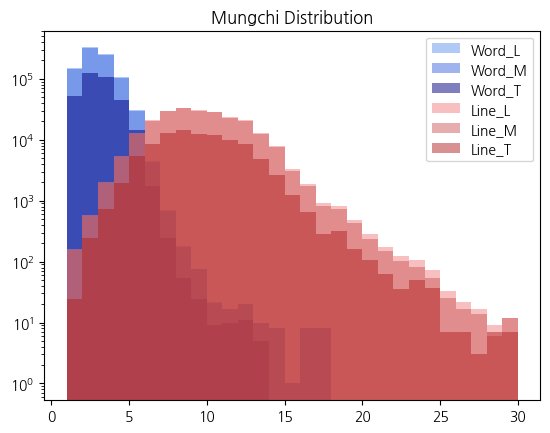

In [497]:
plt.hist(line_word, bins=range(min(line_word), max(line_word) + 1), alpha=0.5, label='Word_L', color='cornflowerblue')
plt.hist(verse_word, bins=range(min(verse_word), max(verse_word) + 1), alpha=0.5, label='Word_M', color='royalblue')
plt.hist(total_word, bins=range(min(total_word), max(total_word) + 1), alpha=0.5, label='Word_T', color='navy')
plt.hist(line_line, bins=range(min(line_line), max(line_line) + 1), alpha=0.5, label='Line_L', color='lightcoral')
plt.hist(verse_line, bins=range(min(verse_line), max(verse_line) + 1), alpha=0.5, label='Line_M', color='indianred')
plt.hist(total_line, bins=range(min(total_line), max(total_line) + 1), alpha=0.5, label='Line_T', color='firebrick')

plt.title('Mungchi Distribution')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

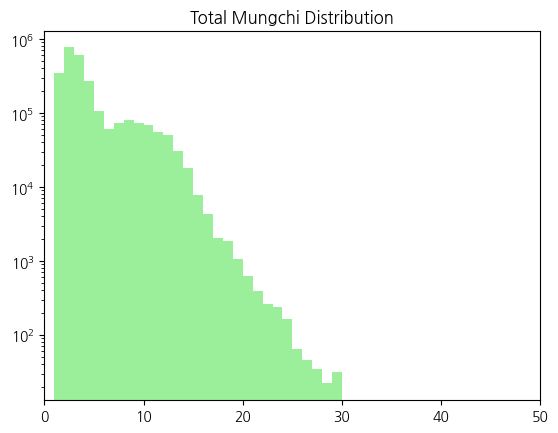

In [498]:
cnt = line_word + verse_word + total_word + line_line + verse_line + total_line

plt.hist(cnt, bins=range(min(cnt), max(cnt) + 1), alpha=0.9, color='lightgreen')
plt.title('Total Mungchi Distribution')
plt.yscale('log')
plt.xlim((0, 50))
plt.show()

- 나쁘지 않게 잘 잘라지는 것 같음 충분히
- 근데, 약간 걸리는건 6-9 사이의 음절들이 살짝 부족해 보인다는 점?
    - 채워준다면, 6-9보다 작은 뭉치들을 특정 조건(Ex. 형태소)에 부합하는 경우 합쳐주는 방법을 쓸 수도 있을 것 같음

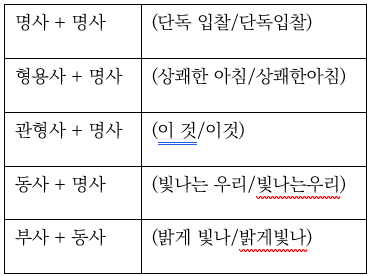

In [499]:
songs_only['line_sample_word_mungchi_string'] = line_samples_word_mungchi_label
songs_only['line_sample_word_mungchi_integer'] = line_samples_word_mungchi_input
songs_only['line_sample_line_mungchi_string'] = line_samples_line_mungchi_label
songs_only['line_sample_line_mungchi_integer'] = line_samples_line_mungchi_input
songs_only['verse_sample_word_mungchi_string'] = verse_samples_word_mungchi_label
songs_only['verse_sample_word_mungchi_integer'] = verse_samples_word_mungchi_input
songs_only['verse_sample_line_mungchi_string'] = verse_samples_line_mungchi_label
songs_only['verse_sample_line_mungchi_integer'] = verse_samples_line_mungchi_input
songs_only['total_sample_word_mungchi_string'] = total_samples_word_mungchi_label
songs_only['total_sample_word_mungchi_integer'] = total_samples_word_mungchi_input
songs_only['total_sample_line_mungchi_string'] = total_samples_line_mungchi_label
songs_only['total_sample_line_mungchi_integer'] = total_samples_line_mungchi_input

/tmp/ipykernel_1844387/87666204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['line_sample_word_mungchi_string'] = line_samples_word_mungchi_label
/tmp/ipykernel_1844387/87666204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_only['line_sample_word_mungchi_integer'] = line_samples_word_mungchi_input
/tmp/ipykernel_1844387/87666204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [500]:
songs_only.tail()

,title,lyrics,genre,check_only_korean,line_samples,verse_samples,total_samples,line_sample_word_mungchi_string,line_sample_word_mungchi_integer,line_sample_line_mungchi_string,line_sample_line_mungchi_integer,verse_sample_word_mungchi_string,verse_sample_word_mungchi_integer,verse_sample_line_mungchi_string,verse_sample_line_mungchi_integer,total_sample_word_mungchi_string,total_sample_word_mungchi_integer,total_sample_line_mungchi_string,total_sample_line_mungchi_integer
6085,버퍼링 (Glitch Mode),Scratch that bring it back\n(Shook\nShook\nHa)...,댄스,False,"[네 앞에선, 난 어질 어질 어질 두통, 또 돌고 돌아, 비상이 걸려, 버 버퍼링이...",[네 앞에선\n난 어질 어질 어질 두통\n또 돌고 돌아\n비상이 걸려\n버 버퍼링이...,[Scratch that bring it back\n(Shook\nShook\nHa...,"[네 / 앞에선, 난 / 어질 / 어질 / 어질 / 두통, 또 / 돌고 / 돌아, ...","[[1, 3], [1, 2, 2, 2, 2], [1, 2, 2], [3, 2], [...","[네 앞에선, 난 어질 어질 어질 두통, 또 돌고 돌아, 비상이 걸려, 버 버퍼링이...","[[4], [9], [5], [5], [6], [6], [8], [8], [7], ...",[네 / 앞에선 / 난 / 어질 / 어질 / 어질 / 두통 / 또 / 돌고 / 돌아...,"[[1, 3, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 5], [...",[네 앞에선 / 난 어질 어질 어질 두통 / 또 돌고 돌아 / 비상이 걸려 / 버 ...,"[[4, 9, 5, 5, 6], [6, 8, 8, 7, 8, 6, 7, 7, 5, ...",[],[],[],[]
6086,Real Love,우린 이 음악을 빌려\n이 분위기를 빌려\n지금 이 공기 이건 마치\n7시간 비행 ...,댄스,False,"[우린 이 음악을 빌려, 이 분위기를 빌려, 지금 이 공기 이건 마치, 낯선 과일 ...",[우린 이 음악을 빌려\n이 분위기를 빌려\n지금 이 공기 이건 마치\n낯선 과일 ...,[우린 이 음악을 빌려\n이 분위기를 빌려\n지금 이 공기 이건 마치\n7시간 비행...,"[우린 / 이 / 음악을 / 빌려, 이 / 분위기를 / 빌려, 지금 / 이 / 공기...","[[2, 1, 3, 2], [1, 4, 2], [2, 1, 2, 2, 2], [2,...","[우린 이 음악을 빌려, 이 분위기를 빌려, 지금 이 공기 이건 마치, 낯선 과일 ...","[[8], [7], [9], [9], [6], [16], [16], [4], [8]...",[우린 / 이 / 음악을 / 빌려 / 이 / 분위기를 / 빌려 / 지금 / 이 / ...,"[[2, 1, 3, 2, 1, 4, 2, 2, 1, 2, 2, 2, 2, 2, 3,...",[우린 이 음악을 빌려 / 이 분위기를 빌려 / 지금 이 공기 이건 마치 / 낯선 ...,"[[8, 7, 9, 9, 6, 16, 16, 4, 8, 7, 9], [9, 7, 1...",[],[],[],[]
6087,내가 아니라도,사랑이었다 별거 없던 내 하루에\n빛이 돼준 단한 사람\n나보다 나를 더 아껴 주던...,발라드,True,"[사랑이었다 별거 없던 내 하루에, 빛이 돼준 단한 사람, 나보다 나를 더 아껴 주...",[사랑이었다 별거 없던 내 하루에\n빛이 돼준 단한 사람\n나보다 나를 더 아껴 주...,[사랑이었다 별거 없던 내 하루에\n빛이 돼준 단한 사람\n나보다 나를 더 아껴 주...,"[사랑이었다 / 별거 / 없던 / 내 / 하루에, 빛이 / 돼준 / 단한 / 사람,...","[[5, 2, 2, 1, 3], [2, 2, 2, 2], [3, 2, 1, 2, 2...","[사랑이었다 별거 없던 내 하루에, 빛이 돼준 단한 사람, 나보다 나를 더 아껴 주...","[[13], [8], [12], [7], [13], [9], [9], [8], [1...",[사랑이었다 / 별거 / 없던 / 내 / 하루에 / 빛이 / 돼준 / 단한 / 사람...,"[[5, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2,...",[사랑이었다 별거 없던 내 하루에 / 빛이 돼준 단한 사람 / 나보다 나를 더 아껴...,"[[13, 8, 12, 7, 13, 9, 9, 8, 12, 6, 12, 14, 4,...",[사랑이었다 / 별거 / 없던 / 내 / 하루에 / 빛이 / 돼준 / 단한 / 사람...,"[[5, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2,...",[사랑이었다 별거 없던 내 하루에 / 빛이 돼준 단한 사람 / 나보다 나를 더 아껴...,"[[13, 8, 12, 7, 13, 9, 9, 8, 12, 6, 12, 14, 4,..."
6088,"스물다섯, 스물하나",바람에 날려 꽃이 지는 계절엔\n아직도 너의 손을 잡은 듯 그런 듯 해\n그때는 아...,록/메탈,True,"[바람에 날려 꽃이 지는 계절엔, 아직도 너의 손을 잡은 듯 그런 듯 해, 그때는 ...",[바람에 날려 꽃이 지는 계절엔\n아직도 너의 손을 잡은 듯 그런 듯 해\n그때는 ...,[바람에 날려 꽃이 지는 계절엔\n아직도 너의 손을 잡은 듯 그런 듯 해\n그때는 ...,"[바람에 / 날려 / 꽃이 / 지는 / 계절엔, 아직도 / 너의 / 손을 / 잡은 ...","[[3, 2, 2, 2, 3], [3, 2, 2, 2, 1, 2, 1, 1], [3...","[바람에 날려 꽃이 지는 계절엔, 아직도 너의 손을 잡은 듯 그런 듯 해, 그때는 ...","[[12], [14], [12], [13], [13], [8], [8], [12],...",[바람에 / 날려 / 꽃이 / 지는 / 계절엔 / 아직도 / 너의 / 손을 / 잡은...,"[[3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 1, 3, 2,...",[바람에 날려 꽃이 지는 계절엔 / 아직도 너의 손을 잡은 듯 그런 듯 해 / 그때...,"[[12, 14, 12, 13, 13, 8, 8], [12, 14, 14, 14, ...",[바람에 / 날려 / 꽃이 / 지는 / 계절엔 / 아직도 / 너의 / 손을 / 잡은...,"[[3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 1, 3, 2,...",[바람에 날려 꽃이 지는 계절엔 / 아직도 너의 손을 잡은 듯 그런 듯 해 / 그때...,"[[12, 14, 12, 13, 13, 8, 8, 12, 14, 14, 14, 14..."
6089,Starlight,난 지금 널 향해 달려가고 있어\n숨이 턱까지 차올라 괜찮아\n잠시 후 널 마주할 ...,"록/메탈, 국내드라마",False,"[난 지금 널 향해 달려가고 있어, 숨이 턱까지 차올라 괜찮아, 잠시 후 널 마주할...",[난 지금 널 향해 달려가고 있어\n숨이 턱까지 차올라 괜찮아\n잠시 후 널 마주할...,[난 지금 널 향해 달려가고 있어\n숨이 턱까지 차올라 괜찮아\n잠시 후 널 마주할...,"[난 / 지금 / 널 / 향해 / 달려가고 / 있어, 숨이 / 턱까지 / 차올라 /...","[[1, 2, 1, 2, 4, 2], [2, 3, 3, 3], [2, 1, 1, 3...","[난 지금 널 향해 달려가고 있어, 숨이 턱까지 차올라 괜찮아, 잠시 후 널 마주할...","[[12], [11], [10], [12], [12], [10], [7], [9],...",[난 / 지금 / 널 / 향해 / 달려가고 / 있어 / 숨이 / 턱까지 / 차올라 ...,"[[1, 2, 1, 2, 4, 2, 2, 3, 3, 3, 2

In [501]:
songs_only.to_json("./ready/dataset_v2.0.json", force_ascii=False, orient = 'records', indent=4)

## 5. 그 외

- Title도 넣어주는데, 제목에 19금이나 (feat,~) 이런 것도 있음. 이런건 지워주자
    - 19금은 아예 뺄 수도 있는데, 그럼 모델 두개 만들어야해서.. 잘 모르겠음
- 앞서 말한 것처럼 fuzzy dedup을 쓸까도 고민이 되긴 함